# Classification of particles into `gamma` (signal) and `hadrons` (background)
## Using Principal Component Analysis

#### The data set was generated by a Monte Carlo program, CORSIKA

Described in [D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers, Forschungszentrum Karlsruhe FZKA 6019 (1998)](https://inspirehep.net/literature/469835)

## Exploring the Dataset

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [33]:
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [34]:
df = pd.read_csv('data/telescope_data.csv', index_col=0)
df.dropna()
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [35]:
# Extract the class classes
classes = df['class']
data_matrix = df.drop(columns='class')

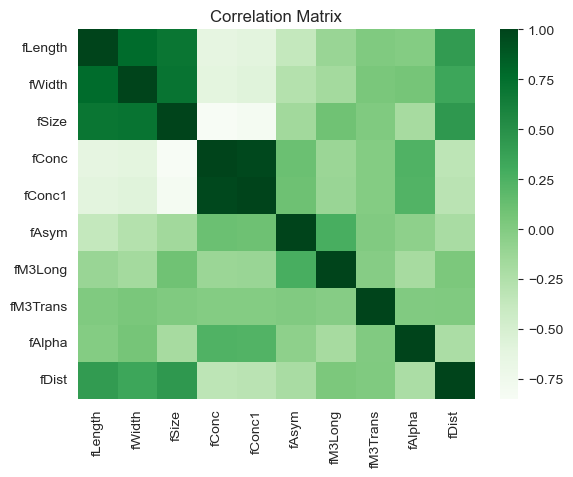

In [36]:
correlation_matrix = data_matrix.corr()

ax = plt.axes()
sns.heatmap(correlation_matrix, cmap='Greens', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

In [37]:
# Eigen-decomposition
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print(f'Eigenvalues length: {eigenvalues.size}, Original Number of Features: {data_matrix.shape[1]}')

Eigenvalues length: 10, Original Number of Features: 10


In [38]:
# Order the eigenvalues from greatest to smallest
indices = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:, indices]

In [39]:
# percentages of information for each eigenvector
information_proportions = eigenvalues / eigenvalues.sum()
information_percentage = information_proportions * 100

- Principal axes vs information proportions for each principal axis

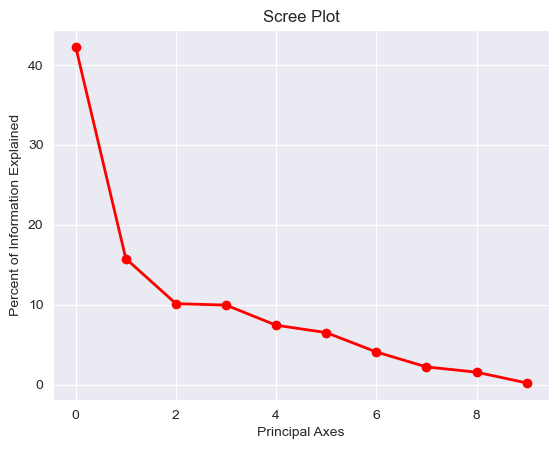

In [40]:
plt.figure()
plt.plot(information_percentage, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Axes')
plt.ylabel('Percent of Information Explained')
plt.show()

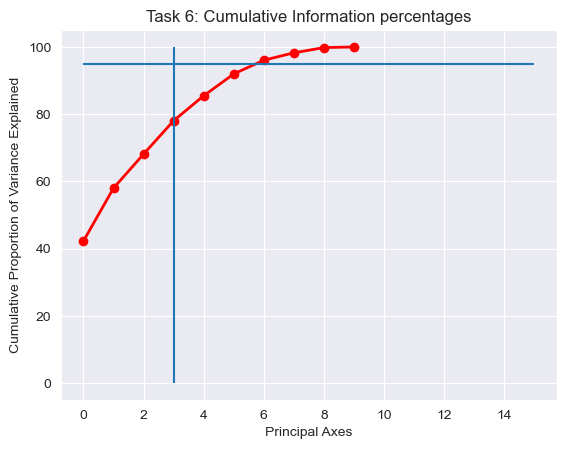

In [41]:
# Find the cumulative sum of the percentages
cumulative_information_percents = np.cumsum(information_percentage)

# Plot the cumulative percentages array
plt.figure()
plt.plot(cumulative_information_percents, 'ro-', linewidth=2)

# plot a horizontal line indicating the 95% mark, and a vertical line for the third principal axis
plt.hlines(y=95, xmin=0, xmax=15)
plt.vlines(x=3, ymin=0, ymax=100)
plt.title('Task 6: Cumulative Information percentages')
plt.xlabel('Principal Axes')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

5 principal components explain approx. 90% of the information in the data

----
&nbsp;
# Performing PCA

In [42]:
# Standardize the data matrix
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / sttd

- PCA by fitting and transforming the data matrix

In [43]:
pca = PCA()
principal_components = pca.fit_transform(data_matrix_standardized)

#print(f'Number of features in the data matrix: {data_matrix.shape[1]}')
#print(f'Number of features in the principal components: {principal_components.shape[1]}')

In [44]:
components = pca.fit(data_matrix_standardized).components_
components = pd.DataFrame(components).transpose()
components.index =  data_matrix.columns
components

,0,1,2,3,4,5,6,7,8,9
fLength,0.408277,0.225699,0.000501,0.025336,0.119474,0.014990,0.437462,0.753225,-0.090466,-0.017996
fWidth,0.395057,0.245282,0.152718,0.094621,0.057897,0.168904,0.495342,-0.539479,0.427867,0.011798
fSize,0.448922,-0.093311,0.070601,0.057495,0.015923,0.027642,0.001072,-0.321599,-0.815749,-0.107612
fConc,-0.441612,0.188376,-0.128920,-0.108618,0.180670,0.104312,0.330737,-0.071913,-0.148747,-0.748912
fConc1,-0.429238,0.195952,-0.139198,-0.116314,0.205565,0.115773,0.389074,-0.105167,-0.315173,0.653467
fAsym,-0.144688,-0.486903,0.377273,0.213917,-0.022737,0.721816,0.113592,0.139312,-0.006971,0.000101
fM3Long,0.005198,-0.599591,0.058326,0.053514,0.598664,-0.459923,0.233845,-0.035734,0.091119,-0.002716
fM3Trans,0.012352,0.031477,0.602870,-0.794686,0.008118,-0.056792,-0.014324,0.017257,-0.009226,0.000009
fAlpha,-0.097175,0.456704,0.469919,0.386270,0.525793,-0.003006,-0.364958,0.026551,-0.039371,0.005783
fDist,0.256681,-0.012468,-0.453523,-0.363894,0.521326,0.458711,-0.318608,-0.016429,0.108867,0.005261


In [45]:
var_ratio = pca.explained_variance_ratio_
var_ratio = pd.DataFrame(var_ratio).transpose()
var_ratio

,0,1,2,3,4,5,6,7,8,9
0,0.422399,0.157519,0.101181,0.099401,0.074202,0.065009,0.040754,0.022036,0.015475,0.002024


In [46]:
print(F"First five components account for {round(var_ratio.iloc[0, 0:6].values.sum(),4)}% of the information")

First five components account for 0.9197% of the information


----
&nbsp;
## PCA with 2 principal axes

In [47]:
pca2 = PCA(n_components=2)

In [48]:
# Fit the standardized data and calculate the principal components
principal_components2 = pca2.fit_transform(data_matrix_standardized)

Plot the principal components with class as hue to see if any clustering has occurred.

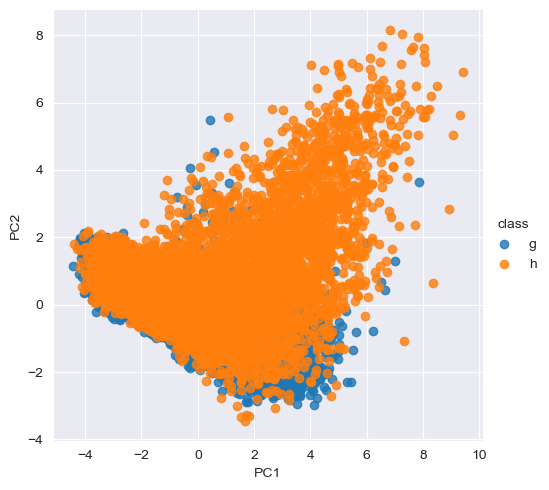

In [49]:
# Plot the principal components as a scatterplot
principal_components_data = pd.DataFrame({
    'PC1': principal_components[:, 0],
    'PC2': principal_components[:, 1],
    'class': classes,
})

sns.lmplot(x='PC1', y='PC2', data=principal_components_data, hue='class', fit_reg=False)
plt.show()

In [50]:
# We will use the one-hot-encoded classes as y
y = classes.astype('category').cat.codes

In [51]:
# Use the principal components as X and split the data into 33% testing and the rest training
X = pca2.fit_transform(data_matrix_standardized)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
# Create a Linear Support Vector Classifier
svc_1 = LinearSVC(random_state=0, tol=1e-5, max_iter=10000)
svc_1.fit(X_train, y_train)

LinearSVC(max_iter=10000, random_state=0, tol=1e-05)

In [53]:
# Generate a score for the testing data
score_1 = svc_1.score(X_test, y_test)
print(f'Score for model with 2 PCA features: {score_1}')

Score for model with 2 PCA features: 0.7417556157400031


In [54]:
# Select two random features from the original data
random_features = list()
for i in range(2):
    random_features.append(random.randint(1, 10))

# Get the column labels from the data_matrix_standardized dataframe
column_labels = list(data_matrix_standardized.columns)

# Select the columns using the labels
selected_labels = [column_labels[random_features[i] - 1] for i in range(2)]
print(F"Selected features: {selected_labels}")

Selected features: ['fConc1', 'fWidth']


In [55]:
X_original = data_matrix_standardized.iloc[:, random_features]
# Split the data intro 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.33, random_state=42)

In [56]:
# Create a Linear Support Vector Classifier
svc_2 = LinearSVC(random_state=0, max_iter=10000)
svc_2.fit(X_train, y_train)

LinearSVC(max_iter=10000, random_state=0)

In [57]:
# Generate a score for the testing data
score_2 = svc_2.score(X_test, y_test)
print(f'Score for model with 2 randomly selected features: {score_2}')

Score for model with 2 randomly selected features: 0.677393659391429
